## Imports of Dictionaries & Dataset

In [11]:
import scipy.stats as stats

from scipy import stats 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import sqlite3
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

## Business Case Summary

Northwind Traders Sales Operation team engaged Master Data Consulting (MDC) to review discount pricing strategies for 2014.  MDC has extensively researched your data tables to evaluate pricing models and strategies for the last year and will deploy statistical modeling  testing tools for the following:

    (1) Review discount strategies to increase products ordered.
    (2) Access what are the best discount structures & strategies.
    (3) Determine if your customers are price sensitive.

Northwind Traders will have these results as part of this technical notebook.  In addition, there will be a summary of observations of your data and our recommendations of discount pricing levels for you to deploy at the conclusion of this workbook.
 

## Exploring Dataset

### Start researching the data by looking at the data for tables and rows of the SQL database.

#### Table names

In [12]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


#### Product

In [13]:
cur.execute("""SELECT * FROM Product;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,0
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00,4,20,5,0
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0
75,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,0


#### Order

In [14]:
cur.execute("""SELECT * FROM 'Order';""")
order_df = pd.DataFrame(cur.fetchall())
order_df.columns = [x[0] for x in cur.description]
order_df

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,2014-05-05,2014-06-02,None,2,24.95,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,Central America,05033,Mexico
826,11074,SIMOB,7,2014-05-06,2014-06-03,None,2,18.44,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
827,11075,RICSU,8,2014-05-06,2014-06-03,None,2,6.19,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
828,11076,BONAP,4,2014-05-06,2014-06-03,None,2,38.28,Bon app',"12, rue des Bouchers",Marseille,Western Europe,13008,France


#### Customer

In [15]:
cur.execute("""SELECT * FROM Customer;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...
86,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,Scandinavia,90110,Finland,981-443655,981-443655
87,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,South America,08737-363,Brazil,(14) 555-8122,None
88,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,North America,98128,USA,(206) 555-4112,(206) 555-4115
89,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,Scandinavia,21240,Finland,90-224 8858,90-224 8858


#### OrderDetail

In [16]:
cur.execute("""SELECT * FROM OrderDetail;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


#### (A note about table data not included:  I didn't include employees, territories or suppliers data because not required for analysis.  BTW, the customer demographic table data is without analytical value )

## Hypothesis Testing

### Hypothesis Q1

#### Did Q1 2014 orders totals increase from Q1 2013?  
##### H_A Q1 2014 orders > Q1 2013 orders
##### H_O Q1 2013 orders < Q1 2014 orders

##### Before data science efforts for this hypothesis question wanted to just look at total sales for 2013 & 2014.

##### Rendering SQL tables Orders & OrderDetails to Pandas DataFrame (named the variable df_ood)

In [8]:
cur.execute("""SELECT * 
               FROM 'Order' o
               JOIN OrderDetail od
               ON o.Id = od.OrderId;
               """)
df_ood = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df_ood.columns = [i[0] for i in cur.description]
df_ood.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0
1,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/42,10248,42,9.8,10,0.0
2,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/72,10248,72,34.8,5,0.0
3,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249/14,10249,14,18.6,9,0.0
4,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249/51,10249,51,42.4,40,0.0


In [9]:
df_ood.head(1)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0


##### Creating DataFrames to compare YOY data

In [32]:
Q1_2013 = df_ood[(df_ood['OrderDate'] >= '2013-01-01') & (df_ood['OrderDate'] <= '2013-03-31')]
Q1_2013_totals = Q1_2013['order_total']

In [ ]:
Q1_2013.tail()

In [30]:
df_ood['order_total'] = df_ood['UnitPrice'] * df_ood['Quantity']

In [31]:
Q1_2014 = df_ood[(df_ood['OrderDate'] >= '2014-01-01') & (df_ood['OrderDate'] <= '2014-03-31')]

Q1_2014_totals = Q1_2014['order_total']

In [ ]:
Q1_2014.iloc[:,-1].sum()


In [ ]:
Q1_2014.tail(1)

In [ ]:
# Code for adding a column to look at order total (named' column order_total)
df_ood['order_total'] = df_ood['UnitPrice'] * df_ood['Quantity']

#### Grouping together customer DataFrame along with order totals

In [33]:
df_ood.groupby(df_ood['CustomerId']).sum().head(50)

,Id,EmployeeId,ShipVia,Freight,OrderId,ProductId,UnitPrice,Quantity,Discount,order_total
CustomerId,,,,,,,,,,
ALFKI,129621,40,17,419.60,129621,554,320.85,174,1.05,4596.20
ANATR,106954,42,24,306.59,106954,402,215.05,63,0.00,1402.95
ANTO,180350,71,33,667.29,180350,650,369.23,359,1.00,7515.35
AROUT,320404,126,67,1447.14,320404,1371,575.30,650,0.70,13806.50
BERGS,552534,217,105,4835.18,552534,2029,1425.65,1001,3.00,26968.15
BLAUS,150911,97,34,351.41,150911,565,347.05,140,0.00,3239.80
BLONP,272374,122,49,1980.00,272374,1141,848.75,666,0.75,19088.00
BOLID,63550,29,11,444.10,63550,234,209.19,190,0.70,5297.80
BONAP,470646,196,84,3952.65,470646,1599,1061.45,980,3.20,23850.95


##### "Getting" YOY Quarterly totals

##### Total revs of $315,242 for Q1 2014.

In [34]:
Q1_2014.iloc[:,-1].sum()

315242.12

##### Total revs of $147,879 for Q1 2013.

In [35]:
Q1_2013.iloc[:,-1].sum()

147879.90000000002

#### Alright, alright.  Getting back to the hypothesis question:
#### Did Q1 2014 orders increase from Q1 2013? 

#### Do a visual of normality with bar charts with SEM

In [36]:
def plot_2_grps(grp1, name1, grp2, name2, ylabel='grp vales'):
    """Plots a bar chart for each group with standard error of the mean error bars.
    Args:
        grp1 (data): group1 data to plot
        name1 (str): Name to display for grp 1
        grp2 (data): group1 data to plot
        name2 (str): Name to display for grp 2
        ylabel (str): Ylabel
        
    Return:
        fig (Figugre)
        ax (Axis)"""
    fig, ax = plt.subplots()
    plt.bar(name1, height= grp1.mean(), yerr=stats.sem(grp1))
    plt.bar(name2, height= grp2.mean(), yerr=stats.sem(grp2))
    ax.set_ylabel(ylabel, fontdict={'weight': 'bold', 
                                           'size' : 12})
    return fig, ax

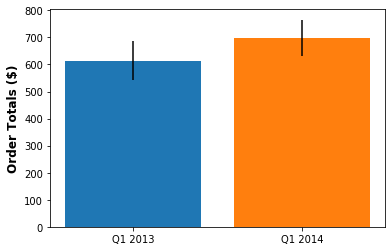

In [37]:
fig, ax = plot_2_grps(Q1_2013_totals, 'Q1 2013', Q1_2014_totals, 'Q1 2014', "Order Totals ($)" )
#fig
# ax.set_ylabel("Order Totals ($)", fontdict={'weight': 'bold', 
#                                            'size' : 12})

In [ ]:
# NEED TO ADD ORDER TOTALS TO Y AXIS
# plt.bar('Q1 2013', height= Q1_2013_totals.mean(), yerr=stats.sem(Q1_2013_totals))
# plt.bar('Q1 2014', height= Q1_2014_totals.mean(), yerr=stats.sem(Q1_2014_totals))


In [ ]:
print(stats.normaltest(Q1_2013_totals))
stats.normaltest(Q1_2014_totals)

#### Reject Null Hypothesis; therefore data is non-normal.

#### Need to use Mann Whitney stats test because of above.

In [ ]:
stats.mannwhitneyu(Q1_2013_totals,Q1_2014_totals)

### Q1 Results:  Failed to reject Null Hypothesis that there is no difference order totals.

### Hypothesis Q2

#### Does discount amount have a statistically significant effect on the quantity of a product in an order.  If so, at what levels of discounts.

#### "Getting" the data. All of it is in one table, the OrderDetail table.

In [24]:
cur.execute("""SELECT * FROM OrderDetail;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


#### Groupby discounts column:

In [38]:
grps = df.groupby('Discount').groups 

for grp in grps:
    grps[grp] = df.groupby('Discount').get_group(grp)['Quantity']  # Loop Creating dict

In [39]:
type(grps)

dict

In [27]:
grps

{0.0: 0       12
 1       10
 2        5
 3        9
 4       40
         ..
 2147     2
 2148     2
 2151     1
 2153     4
 2154     2
 Name: Quantity, Length: 1317, dtype: int64, 0.01: 2152    2
 Name: Quantity, dtype: int64, 0.02: 2133    1
 2146    3
 Name: Quantity, dtype: int64, 0.03: 2139    1
 2140    2
 2150    2
 Name: Quantity, dtype: int64, 0.04: 2141    1
 Name: Quantity, dtype: int64, 0.05: 8        6
 9       15
 11      40
 12      25
 51      12
         ..
 2116    10
 2123    14
 2134     1
 2137     2
 2144     2
 Name: Quantity, Length: 185, dtype: int64, 0.06: 2149    2
 Name: Quantity, dtype: int64, 0.1: 107     10
 108      3
 115     20
 116     24
 117      2
         ..
 2095    30
 2096    77
 2098    25
 2099     4
 2135     2
 Name: Quantity, Length: 173, dtype: int64, 0.15: 6       35
 7       15
 17      15
 18      21
 48      25
         ..
 2112    20
 2113    30
 2124    10
 2125    30
 2126     2
 Name: Quantity, Length: 157, dtype: int64, 0.2: 29 

#### Discount amounts are below.
#### assist with second half of question about the different levels of discounts.

In [40]:
grps.keys()   # Below are the dict keys or the discounts

dict_keys([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25])

#### Testing the null hypothesis that two or more groups have the same population mean with one-way ANOVA test:

In [41]:
# PLOT BAR CHART FOR EACH DISCOUNT LEVEL.  Y AXIS SHOULD BE DISCOUNT PERCENTAGES, CORRECT?

In [ ]:

import seaborn as sns 

sns.barplot(x=, y=y2, palette="vlag", ax=ax2)


In [42]:

stats.f_oneway(grps[0.0], grps[0.05], grps[0.10], grps[0.15], grps[0.2], grps[0.25])

F_onewayResult(statistic=9.798709497651332, pvalue=2.840680781326738e-09)

#### Results:  Have rejected null hypothesis; therefore 2 or more groups have the different mean.

#### Now, can start the next stage of this hypothesis question to "figure-out" if discounts effects quantity products ordered:

###### Separate orders by discount:

In [43]:
df['discounted'] = np.where(df['Discount'] == 0.00, 0, 1) 
# putting 0 where there's no discount & 1 where there is a discount

In [44]:
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.00,12,0.00,0
1,10248/42,10248,42,9.80,10,0.00,0
2,10248/72,10248,72,34.80,5,0.00,0
3,10249/14,10249,14,18.60,9,0.00,0
4,10249/51,10249,51,42.40,40,0.00,0
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,1
2151,11077/66,11077,66,17.00,1,0.00,0
2152,11077/73,11077,73,15.00,2,0.01,1
2153,11077/75,11077,75,7.75,4,0.00,0


##### Create bar chart with Full Price & Discount Price to have visualization of data for hypothesis question:

In [45]:
grp0 = df.groupby('discounted').get_group(0)['Quantity']
grp1 = df.groupby('discounted').get_group(1)['Quantity']

Text(0, 0.5, 'Quantity')

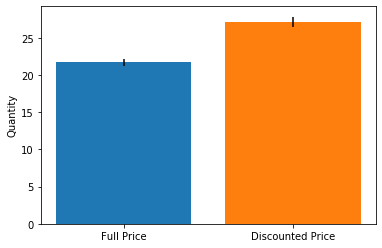

In [46]:
plt.bar(x='Full Price', height = grp0.mean(), yerr=stats.sem(grp0));
plt.bar(x='Discounted Price', height = grp1.mean(), yerr=stats.sem(grp1));
plt.ylabel("Quantity")

##### BTW,  since Error Bars don't overlap in the above chart there' very low chance of results occurring by chance.   

#### Lastly, compare means with Tukey stats tool to evaluate H_N.

In [47]:
import statsmodels.api as sms

In [48]:
model = sms.stats.multicomp.pairwise_tukeyhsd(df.Quantity, df.Discount)
model.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0.0,0.01,-19.7153,0.9,-80.3306,40.9001,False
0.0,0.02,-19.7153,0.9,-62.593,23.1625,False
0.0,0.03,-20.0486,0.725,-55.0714,14.9742,False
0.0,0.04,-20.7153,0.9,-81.3306,39.9001,False
0.0,0.05,6.2955,0.0011,1.5381,11.053,True
0.0,0.06,-19.7153,0.9,-80.3306,40.9001,False
0.0,0.1,3.5217,0.4269,-1.3783,8.4217,False
0.0,0.15,6.6669,0.0014,1.551,11.7828,True
0.0,0.2,5.3096,0.0303,0.2508,10.3684,True
0.0,0.25,6.525,0.0023,1.3647,11.6852,True


#### Results:  Null Hypothesis is rejected so the discounts do matter.  In fact, all discounts have a false value in the Tukey model above so each and every discounts is significant.  

### Analysis for second half of question:  what best level of discounts:

#### Graph below for Confidence Intervals as well as having a visual of which discounts might offer the best value and can determine that shouldn't go-over 15% discount.

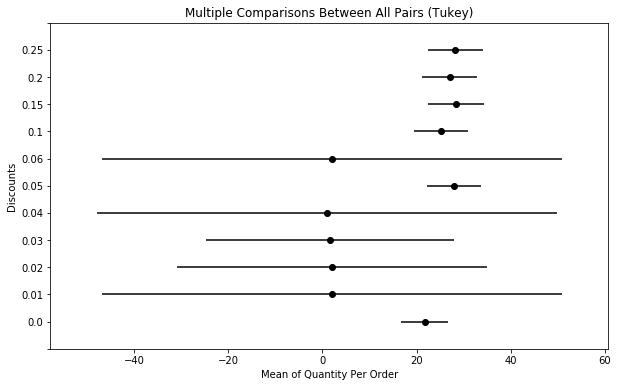

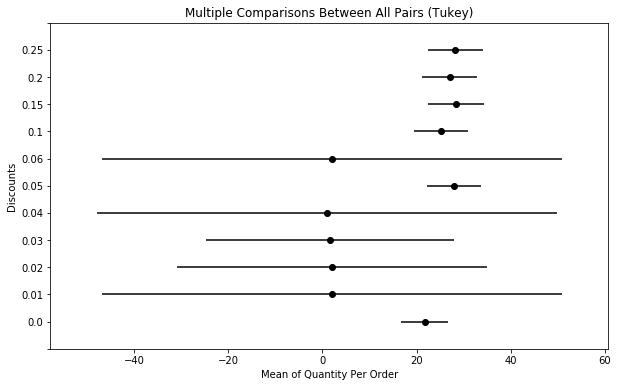

In [49]:
model.plot_simultaneous(xlabel = "Mean of Quantity Per Order", ylabel = 'Discounts')

#### Recommendations:  There are two from the above results:  
##### (1) know statistically that discounts do increase the value or orders; 
##### (2) know with "Confidence" that should limit discounts to no more than 15% because order values don't increase much after that amount.

### Hypothesis Q3

#### Are order totals greater with discount products?
##### H_A  order totals > discount order totals
##### H_O order totals < discount order totals

In [50]:
cur.execute("""SELECT * FROM OrderDetail;""")  # Getting the table
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.00,12,0.00
1,10248/42,10248,42,9.80,10,0.00
2,10248/72,10248,72,34.80,5,0.00
3,10249/14,10249,14,18.60,9,0.00
4,10249/51,10249,51,42.40,40,0.00
...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03
2151,11077/66,11077,66,17.00,1,0.00
2152,11077/73,11077,73,15.00,2,0.01
2153,11077/75,11077,75,7.75,4,0.00


In [51]:
#adding col with order_total
df['order_total'] = df['Quantity']* df['UnitPrice']

In [52]:
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,order_total
0,10248/11,10248,11,14.00,12,0.00,168.0
1,10248/42,10248,42,9.80,10,0.00,98.0
2,10248/72,10248,72,34.80,5,0.00,174.0
3,10249/14,10249,14,18.60,9,0.00,167.4
4,10249/51,10249,51,42.40,40,0.00,1696.0
...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,66.5
2151,11077/66,11077,66,17.00,1,0.00,17.0
2152,11077/73,11077,73,15.00,2,0.01,30.0
2153,11077/75,11077,75,7.75,4,0.00,31.0


#### Same process as above adding a column putting 0 where there's no discounts & 1 where there are discounts.

In [53]:
df['discounted'] = np.where(df['Discount'] == 0, 0, 1) 
df

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,order_total,discounted
0,10248/11,10248,11,14.00,12,0.00,168.0,0
1,10248/42,10248,42,9.80,10,0.00,98.0,0
2,10248/72,10248,72,34.80,5,0.00,174.0,0
3,10249/14,10249,14,18.60,9,0.00,167.4,0
4,10249/51,10249,51,42.40,40,0.00,1696.0,0
...,...,...,...,...,...,...,...,...
2150,11077/64,11077,64,33.25,2,0.03,66.5,1
2151,11077/66,11077,66,17.00,1,0.00,17.0,0
2152,11077/73,11077,73,15.00,2,0.01,30.0,1
2153,11077/75,11077,75,7.75,4,0.00,31.0,0


In [54]:
total0 = df.groupby('discounted').get_group(0) # testing get_group to make sure it works

In [55]:
total1 = df.groupby('discounted').get_group(1)

##### Dividing the 0's and 1's into groups to graph them:

In [56]:
total1 = df.groupby('discounted').get_group(1)['order_total']
total0 = df.groupby('discounted').get_group(0)['order_total']

<BarContainer object of 1 artists>

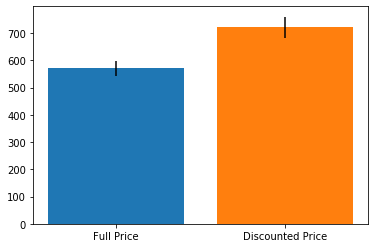

In [57]:
plt.bar('Full Price', height=total0.mean(), yerr=stats.sem(total0))
plt.bar('Discounted Price', height=total1.mean(), yerr=stats.sem(total1))


##### Are groups large enough to ignore assumption of normality?  Yes.  See results below for confirmation.  Therefore, used Levene test.

In [58]:
print(len(total1))
print(len(total0))

838
1317


In [59]:
stats.levene(total1, total0)

LeveneResult(statistic=6.117378890508237, pvalue=0.013462566863922663)

In [60]:
stats.ttest_ind(total1, total0, equal_var=False)


Ttest_indResult(statistic=3.172067236911555, pvalue=0.0015429865021245243)

#### Results:  Its significant because less than significant value of .05; therefore reject H_0, which means that customers orders are larger with discounted products.

#### Recommendations:  For those products where one of the goals form them are  higher sales, then promote them with discounts.  In most cases, you can probably limit your discounts to no more than 5% (see results from above Hypothesis Question)

### Hypothesis Q4

##### Which customers order without discounts? Searching for customers who are NOT price sensitive.
#### H_A:  customers unequal discounts
#### H_O:  customers equal discounts

In [61]:
cur.execute("""SELECT * 
               FROM 'Order' o
               JOIN OrderDetail od
               ON o.Id = od.OrderId
               WHERE Discount = 0;
               """)
no_dis_df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
no_dis_df.columns = [i[0] for i in cur.description]
no_dis_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0
1,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/42,10248,42,9.8,10,0.0
2,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/72,10248,72,34.8,5,0.0
3,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249/14,10249,14,18.6,9,0.0
4,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249/51,10249,51,42.4,40,0.0


In [62]:
no_dis_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/11,10248,11,14.0,12,0.0
1,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/42,10248,42,9.8,10,0.0
2,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,10248/72,10248,72,34.8,5,0.0
3,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249/14,10249,14,18.6,9,0.0
4,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,10249/51,10249,51,42.4,40,0.0


#### Darn it!  This above DataFrame doesn't work b/c discounts are by line item and not order totals so it will show customers that have ordered with discounts thinking that they have not.

#### JOIN Order & OrderDetail.  Give var name of df_ood for Order OrderDetail.

In [ ]:
cur.execute("""SELECT * 
               FROM 'Order' o
               JOIN OrderDetail od
               ON o.Id = od.OrderId;
               """)
df_ood = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
df_ood.columns = [i[0] for i in cur.description]
df_ood.head()

#### Adding a column to look at order total (called order_total).

In [ ]:
df_ood['order_total'] = df_ood['UnitPrice'] * df_ood['Quantity']

In [ ]:
df_ood.groupby(df_ood['CustomerId']).sum().head(50)

#### Getting customers with no discounts cust_no_dis_df

In [73]:
cur.execute("""SELECT CustomerId, SUM(Discount), SUM(Quantity)
               FROM 'Order' o
               JOIN OrderDetail od
               ON o.Id = od.OrderId
               GROUP BY o.CustomerId
               HAVING SUM(Discount) = 0;
               """)
cust_no_dis_df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
cust_no_dis_df.columns = [i[0] for i in cur.description]
cust_no_dis_df.head(3)

,CustomerId,SUM(Discount),SUM(Quantity)
0,ANATR,0.0,63
1,BLAUS,0.0,140
2,BSBEV,0.0,293


###### Hypothesis
##### H_A cust with zero discounts buy less
##### H_N cust with zero discount buy same amount

#### note about data:  assumption that data is normal because sample size is more than large enough.

##### Getting customer data with discounts:  cust_with_dis_df

In [74]:
cur.execute("""SELECT CustomerId, SUM(Discount), SUM(Quantity)
               FROM 'Order' o
               JOIN OrderDetail od
               ON o.Id = od.OrderId
               GROUP BY o.CustomerId
               HAVING SUM(Discount) > 0;
               """)
cust_with_dis_df = pd.DataFrame(cur.fetchall()) #Take results and create dataframe
cust_with_dis_df.columns = [i[0] for i in cur.description]
cust_with_dis_df.head(3)

,CustomerId,SUM(Discount),SUM(Quantity)
0,ALFKI,1.05,174
1,ANTO,1.00,359
2,AROUT,0.70,650


##### Visualization 

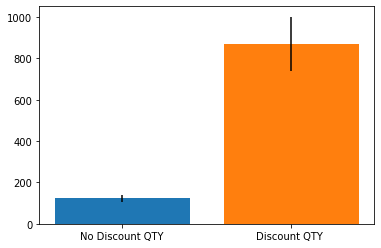

In [75]:
plt.bar(x='No Discount QTY', height = cust_no_dis_df['SUM(Quantity)'].mean(), yerr=stats.sem(cust_no_dis_df['SUM(Quantity)']));
plt.bar(x='Discount QTY ', height = cust_with_dis_df['SUM(Quantity)'].mean(), yerr=stats.sem(cust_with_dis_df['SUM(Quantity)']));


#### Testing Null Hypothesis with 2 sample t test (code below):

In [76]:
stats.ttest_ind(cust_no_dis_df['SUM(Quantity)'],cust_with_dis_df['SUM(Quantity)'])

Ttest_indResult(statistic=-4.586149855913255, pvalue=1.5045188654504239e-05)

#### Result:  Reject Null Hypothesis based on P Value so customers with zero discount buy less.

##### Recommendation:  continue to offer discounts for customers to buy more quantities of products as well as targeting customers who have not used discounts so they buy more based on what we've discounted to them.  

## Conclusion 
We analyzed the data to gain a complete understanding of Tradewind Partners discount practices over the last fiscal year.  For the most part, your discount strategies are working well:

YOY sales increased by more than 110%
Your orders have increased
Your product quantities have increased

We have the following recommendations for you to consider for your pricing policies in the following year:

Continue to use many of the same strategies that you deployed last year because they have worked demonstrated by the above data.
Be more conscience with the discounts percentages you offer to your clients.  Anything less than 5% really have no importance to them
In addition, there’s little need to offer discounts more than 15%.  Moreover, save your margins because you clients are not as motivated to purchase with discounts greater than 15%.
The vast majority of your customers are very price sensitive based on the huge amount of volume of orders with discounts. This knowledge is power:  offer discounts to motivate your buyers to buy in the timeframe that meets your inventory needs, such as overstock items and to deplete inventory of perishable goods.

Thank you.

Master Data Consulting